# Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


# Loading the important libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset 

In [3]:
df=pd.read_csv('Baseball_project.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Viewing top 5 head of the dataset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#checking the shape of the dataset (rows and column wise)
df.shape

(30, 17)

In [6]:
#checking the columns names 
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
#Getting some more informations 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There is no null values present in dataset and all are int types except ERA column 

In [8]:
#Checking the duplicated values
sum(df.duplicated())

0

In [9]:
#Checking the null values and sum of all values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null values in this dataset

<AxesSubplot:>

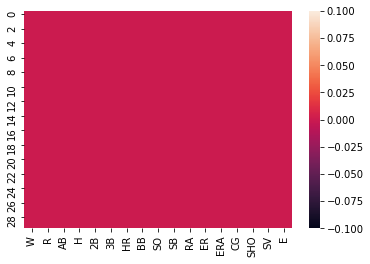

In [10]:
#We can also vishuvalise the null values through heatmap
sns.heatmap(df.isnull())

In [11]:
#getting information about stastical details from dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:

1.There is no much difference between mean and median.

# Exploratory data analysis

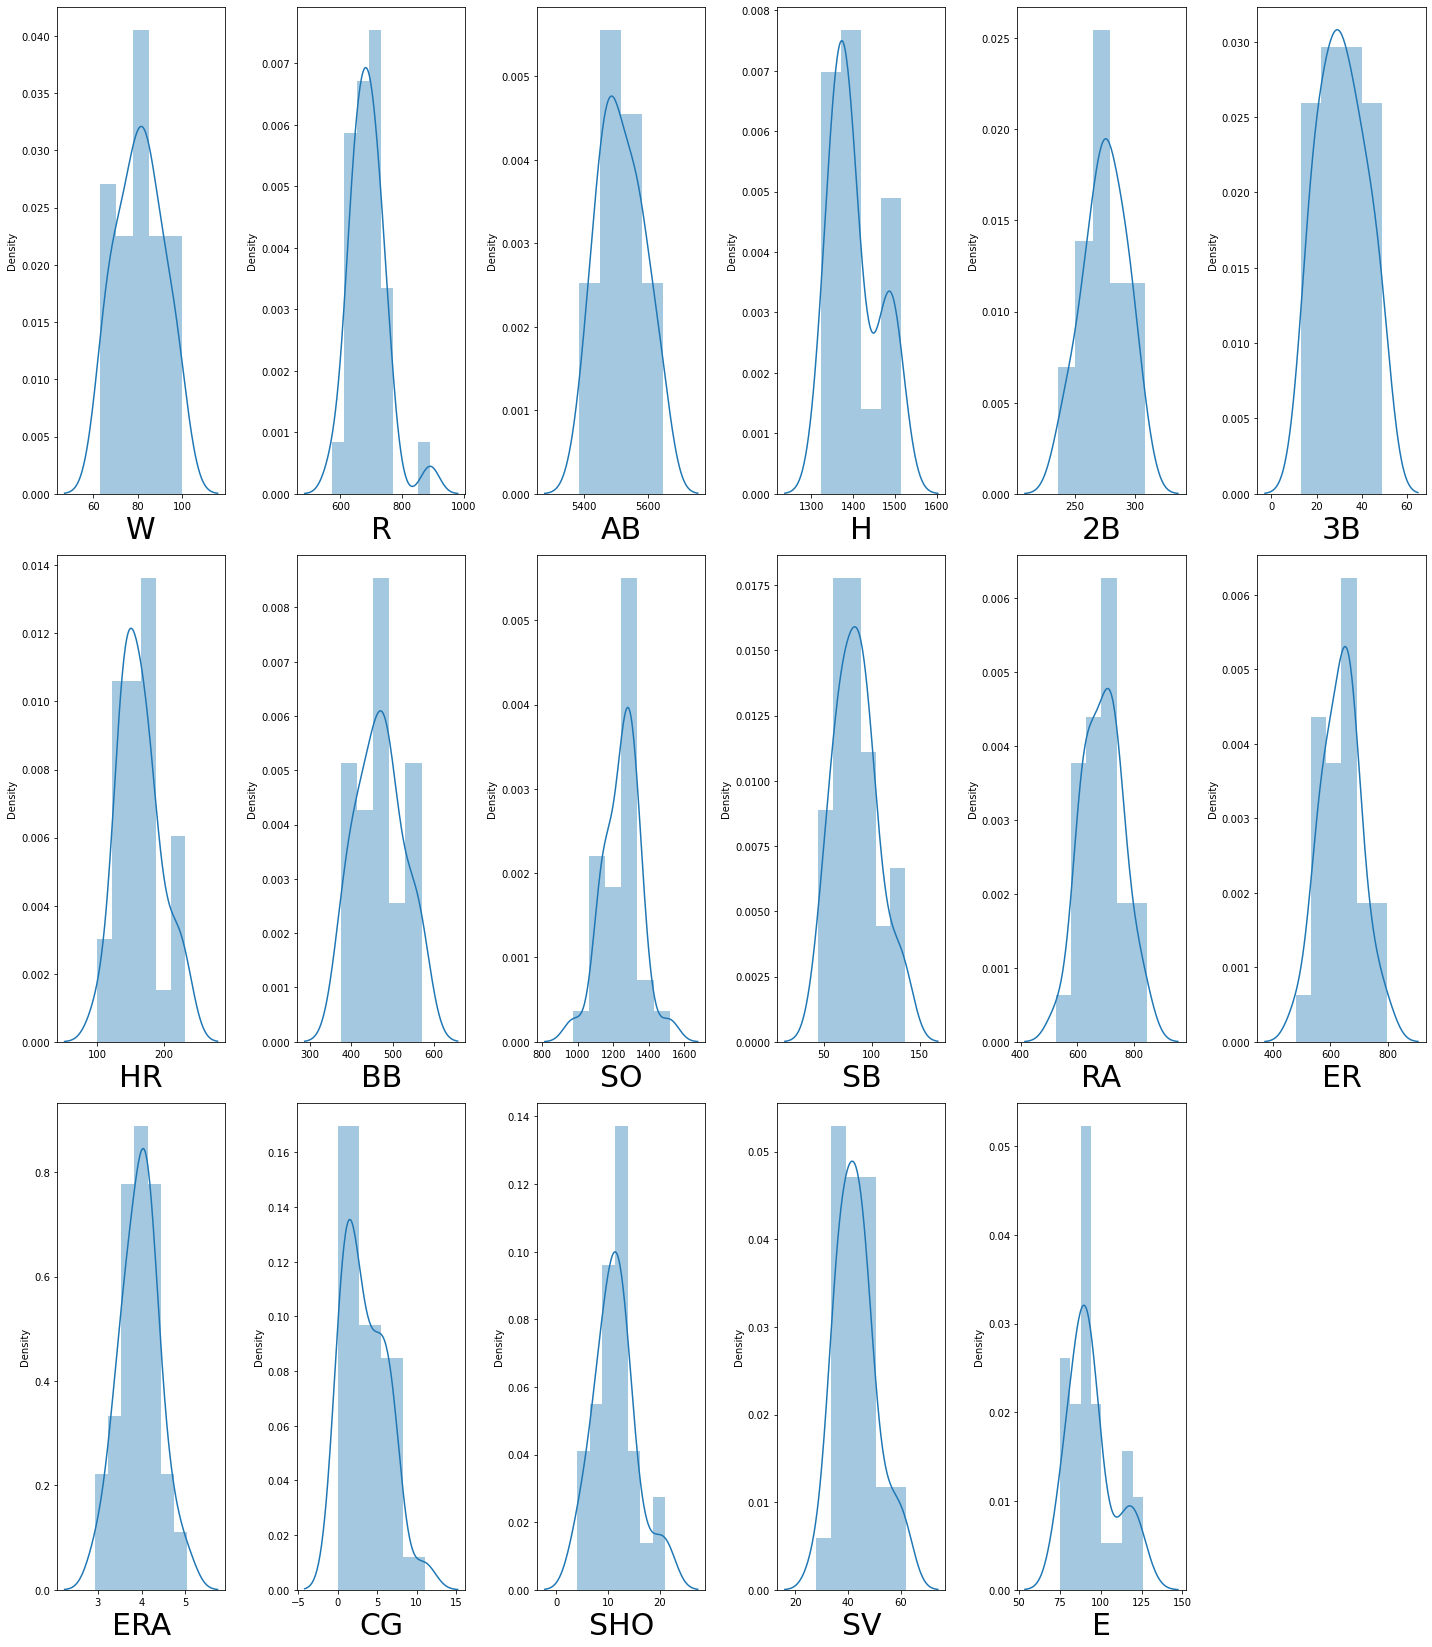

In [12]:
plt.figure(figsize=(20,23))
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=30)
        
    plotnumber+=1
plt.tight_layout()

These datas are normally distributed and there is no skewness present in this datasets.

<AxesSubplot:>

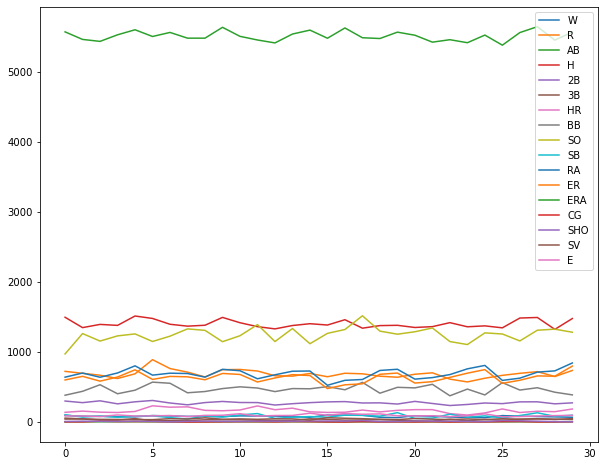

In [13]:
#Lets check the highest no 
df.plot.line(figsize=(10,8))

AB Is the highest number and remaining all are below 1500 numbers.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

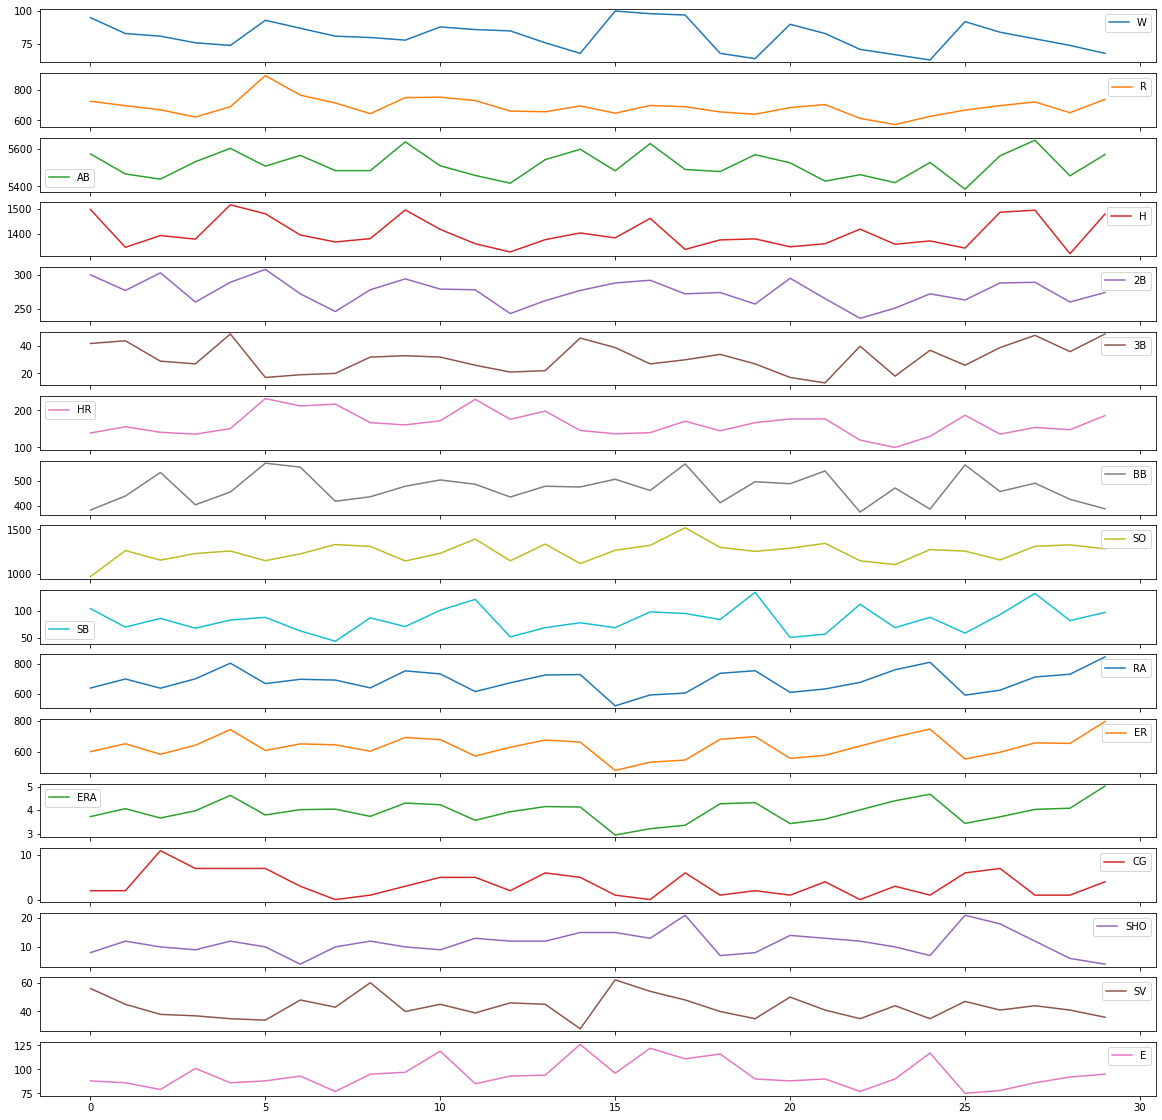

In [14]:
df.plot.line(subplots=True,figsize=(20,20))

array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

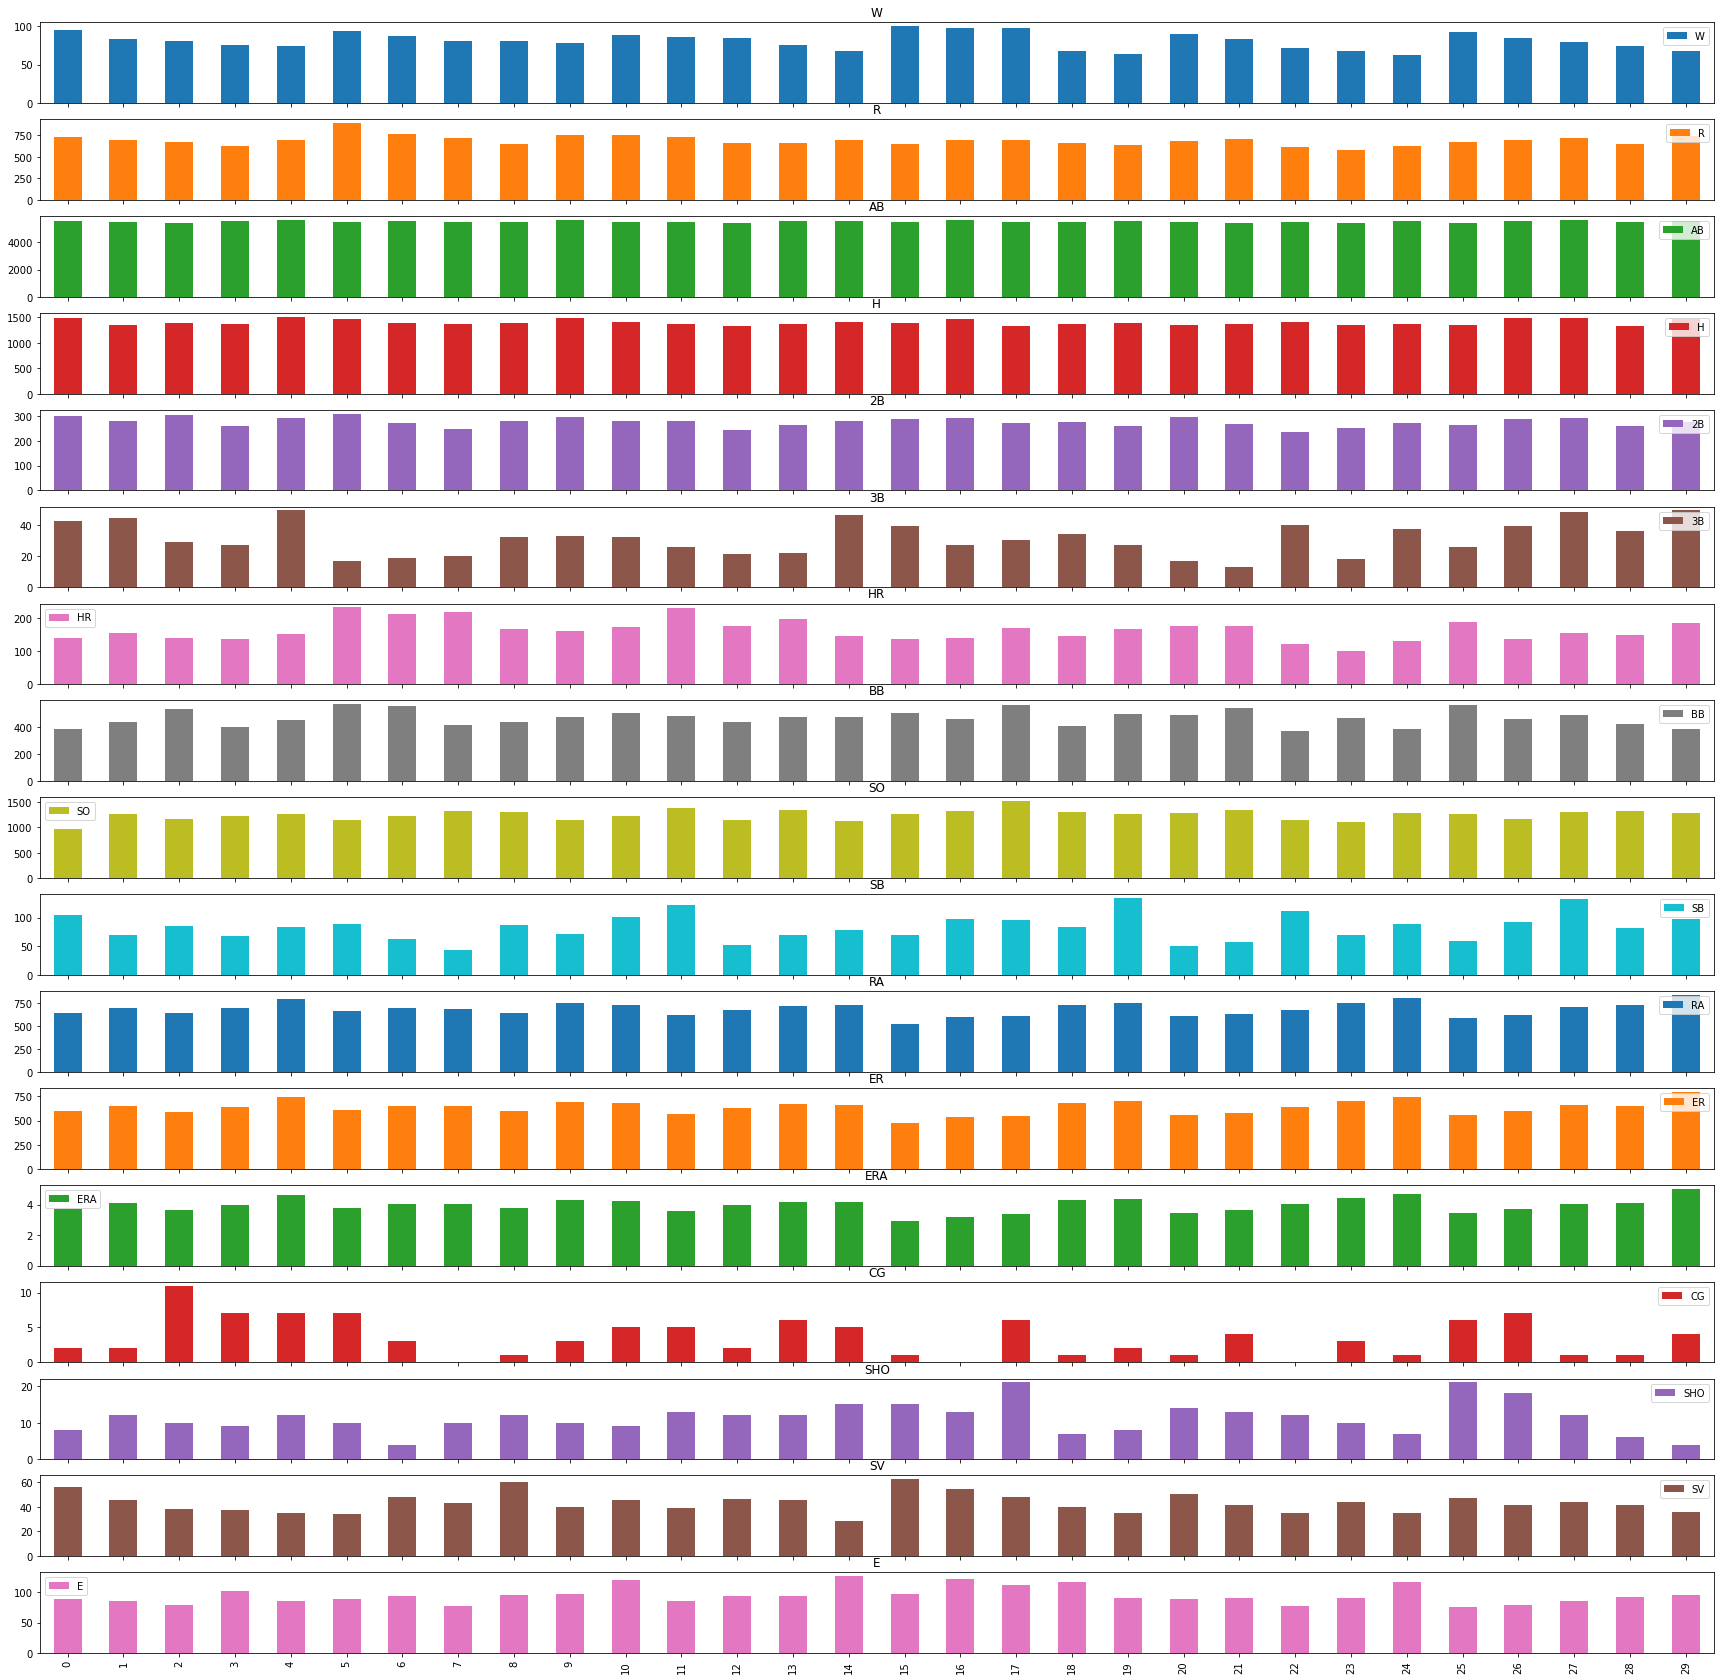

In [15]:
df.plot.bar(subplots=True,stacked=False,figsize=(30,30))

Now We can look histogram for target column to vishuvalise distribution of wins

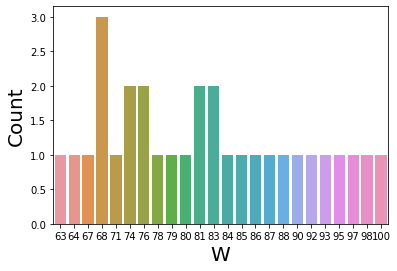

In [16]:
count = df["W"].value_counts()
plt.figsize = (50,40)
plt.ylabel("Count",fontsize = 20)
plt.xlabel("W",fontsize = 20)
sns.barplot(count.index, count.values)
plt.show()

In [17]:
#Let's look the correleation between variables
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


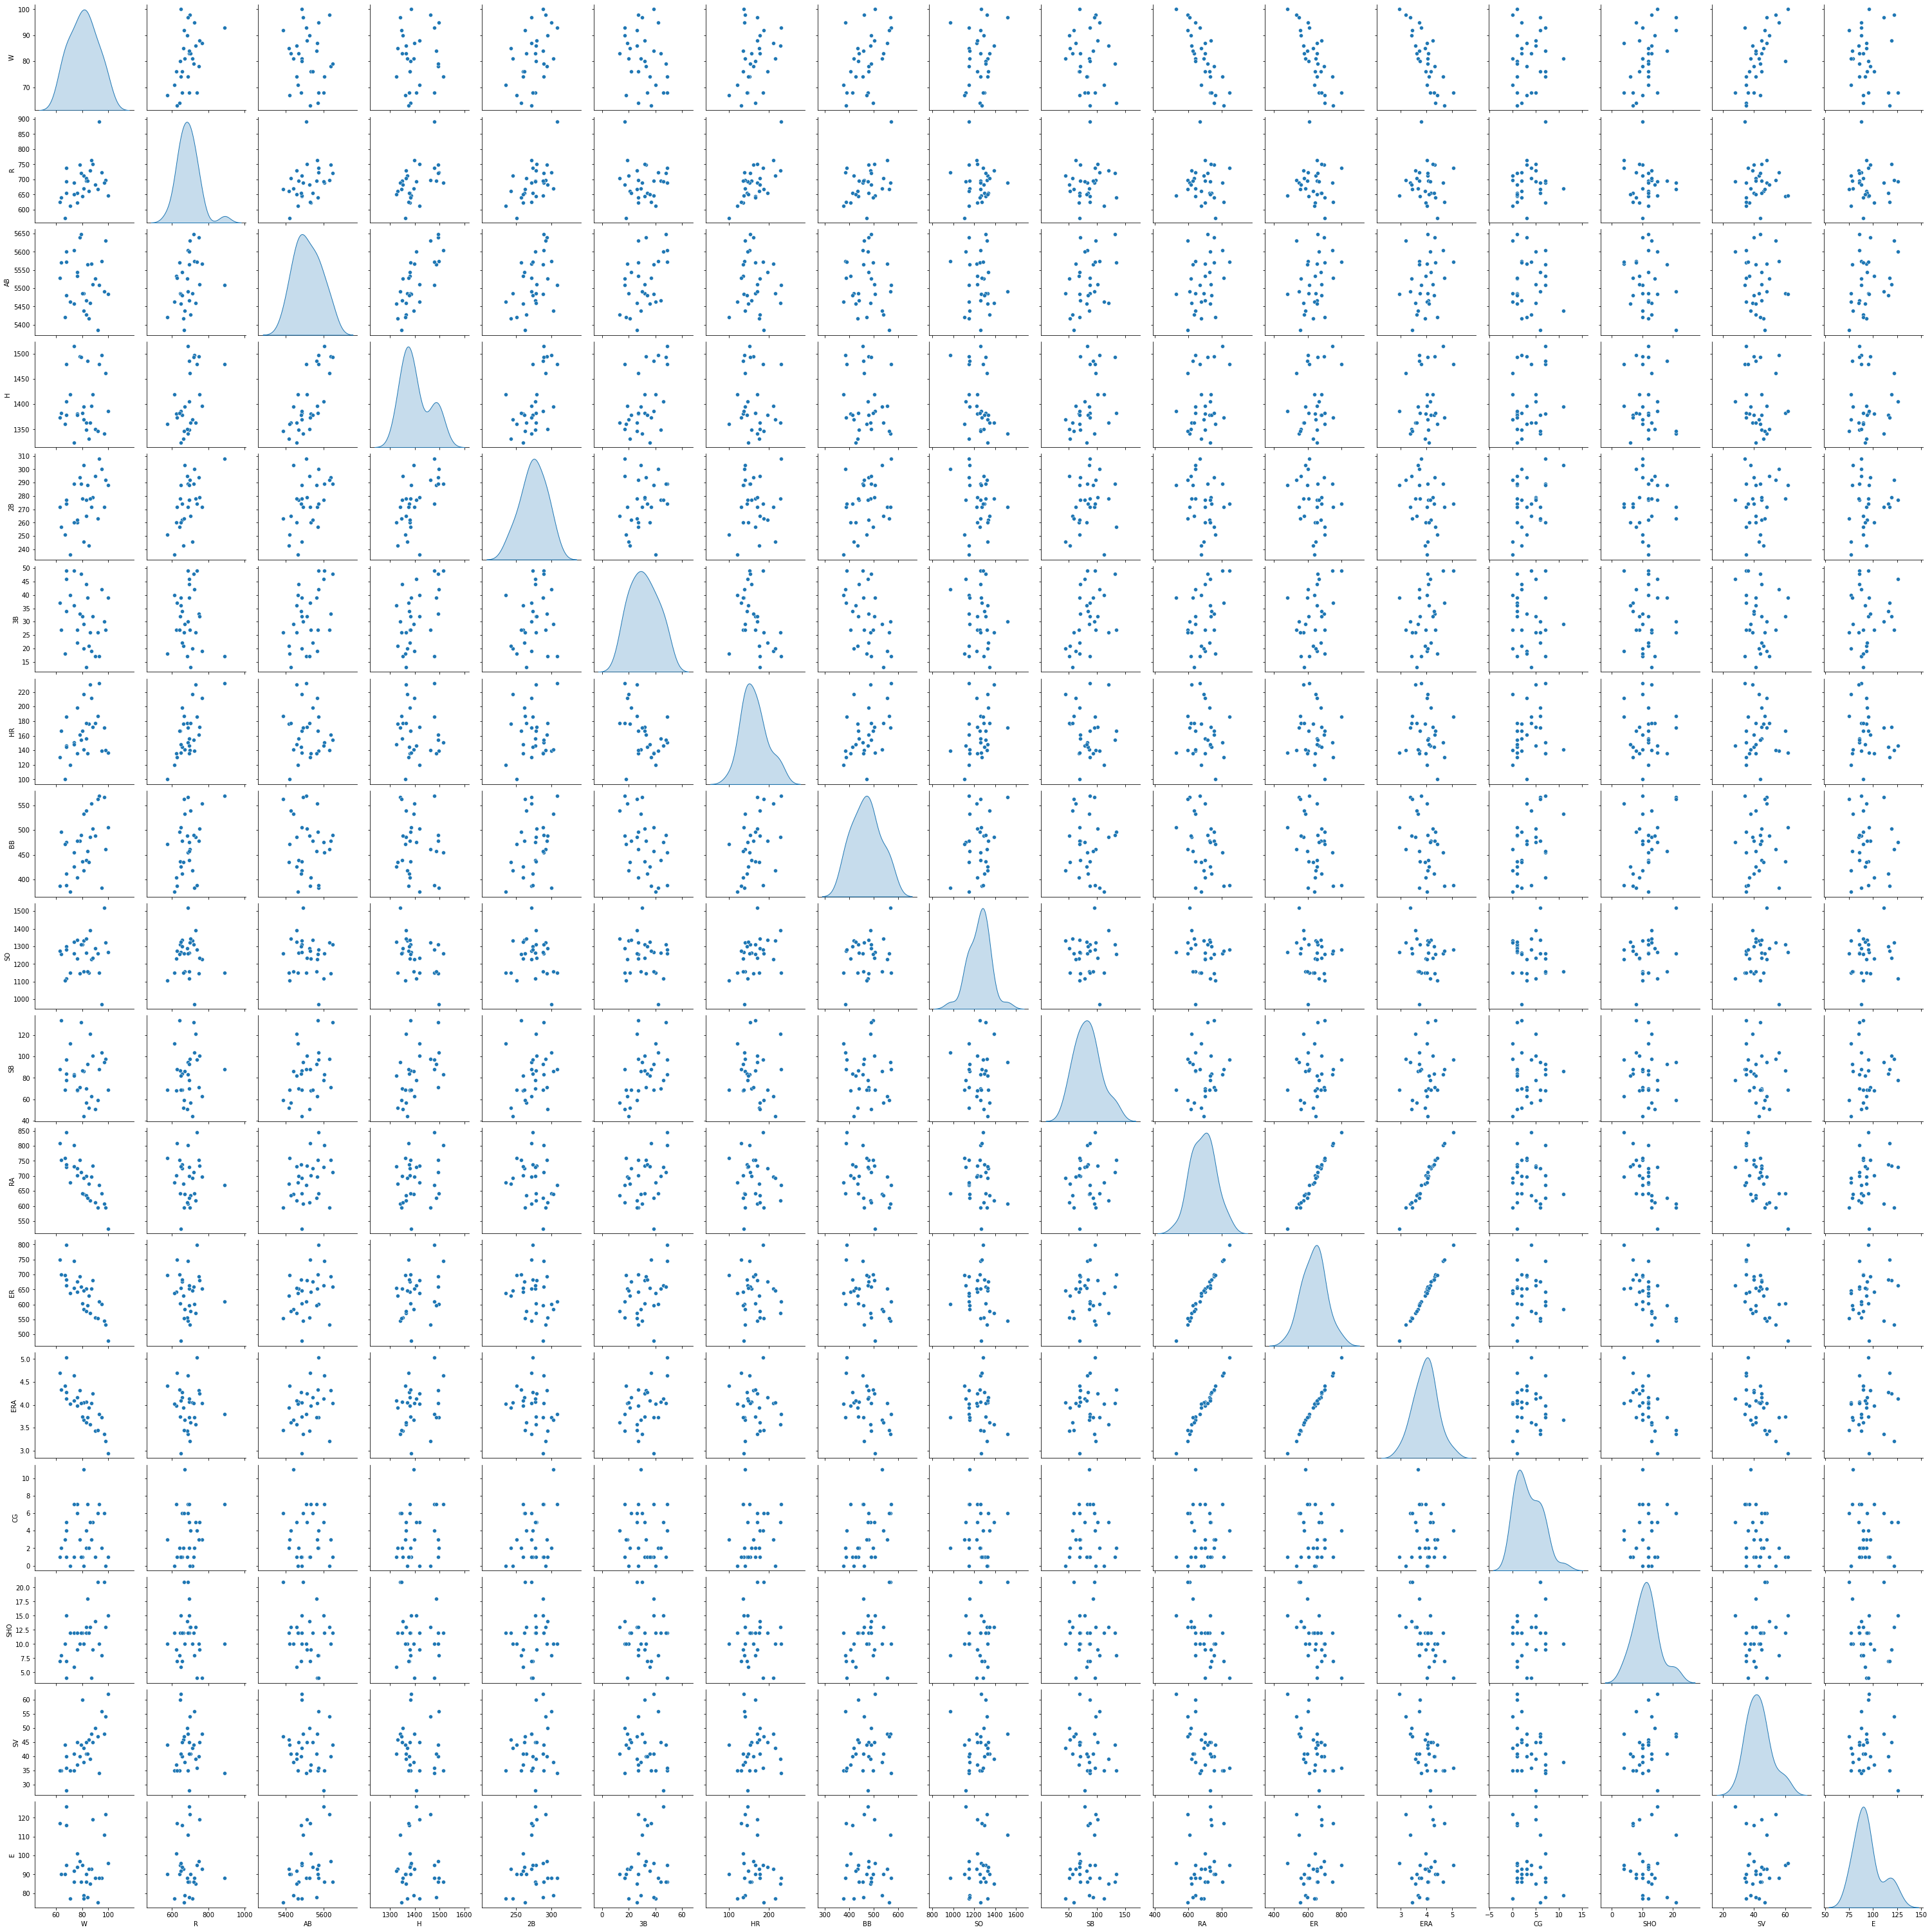

In [18]:
sns.pairplot(df,diag_kind='kde')

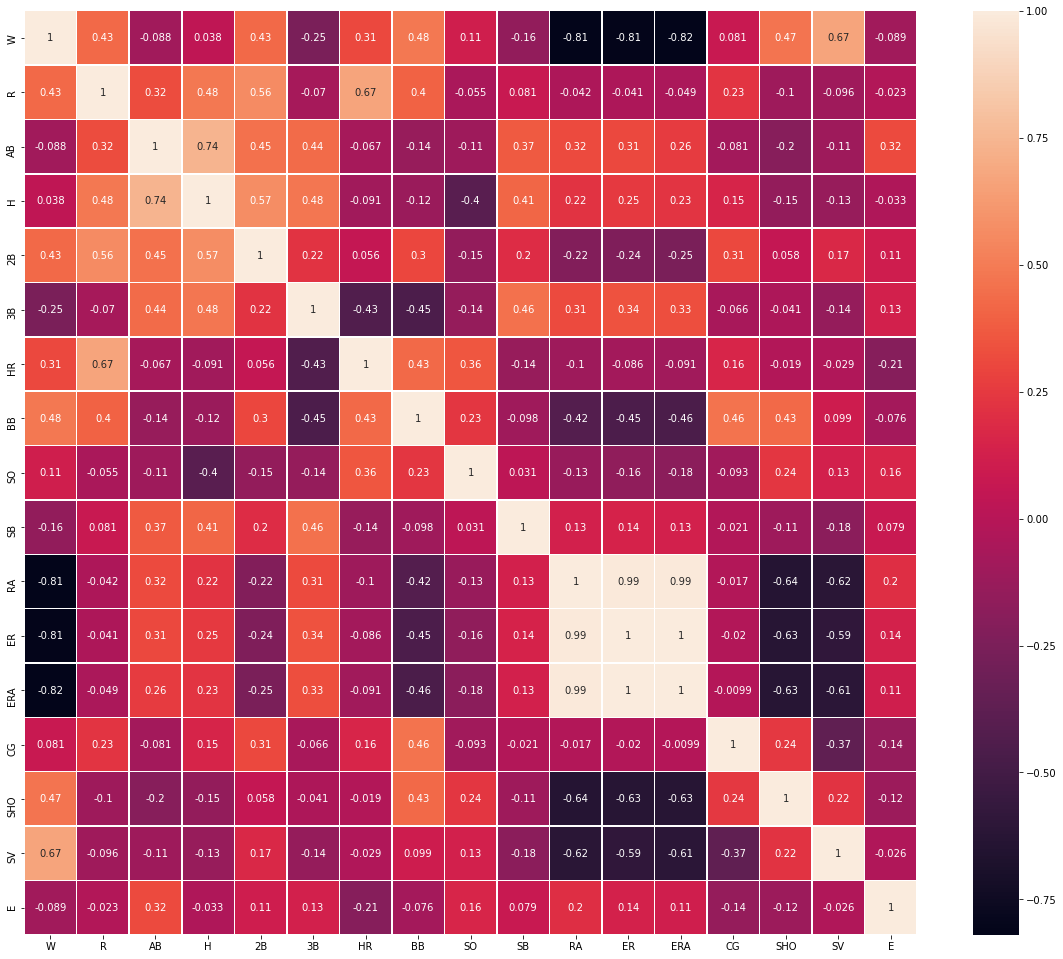

In [19]:
#Let's see the correlation through heatmap
fig, ax = plt.subplots(figsize=(20,17))
sns.heatmap(df.corr(), annot=True, linewidth=.5, ax=ax)
plt.show()

observations:
    ERA,ER,RA are highly negatively correleated with Target Variable

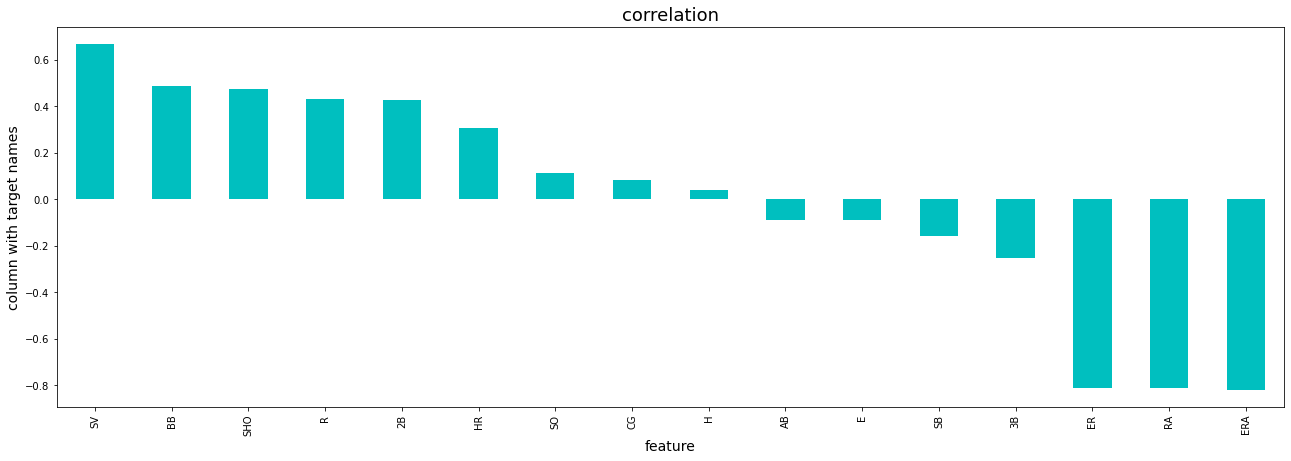

In [20]:
#Vishualize correlation
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


In [21]:
#separating the x and y features and target columns
X=df.drop(columns=['W'])
Y=df['W']

In [22]:
#After separating see the top 5 of X
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [23]:
#After separating see the top 5 of Y
Y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

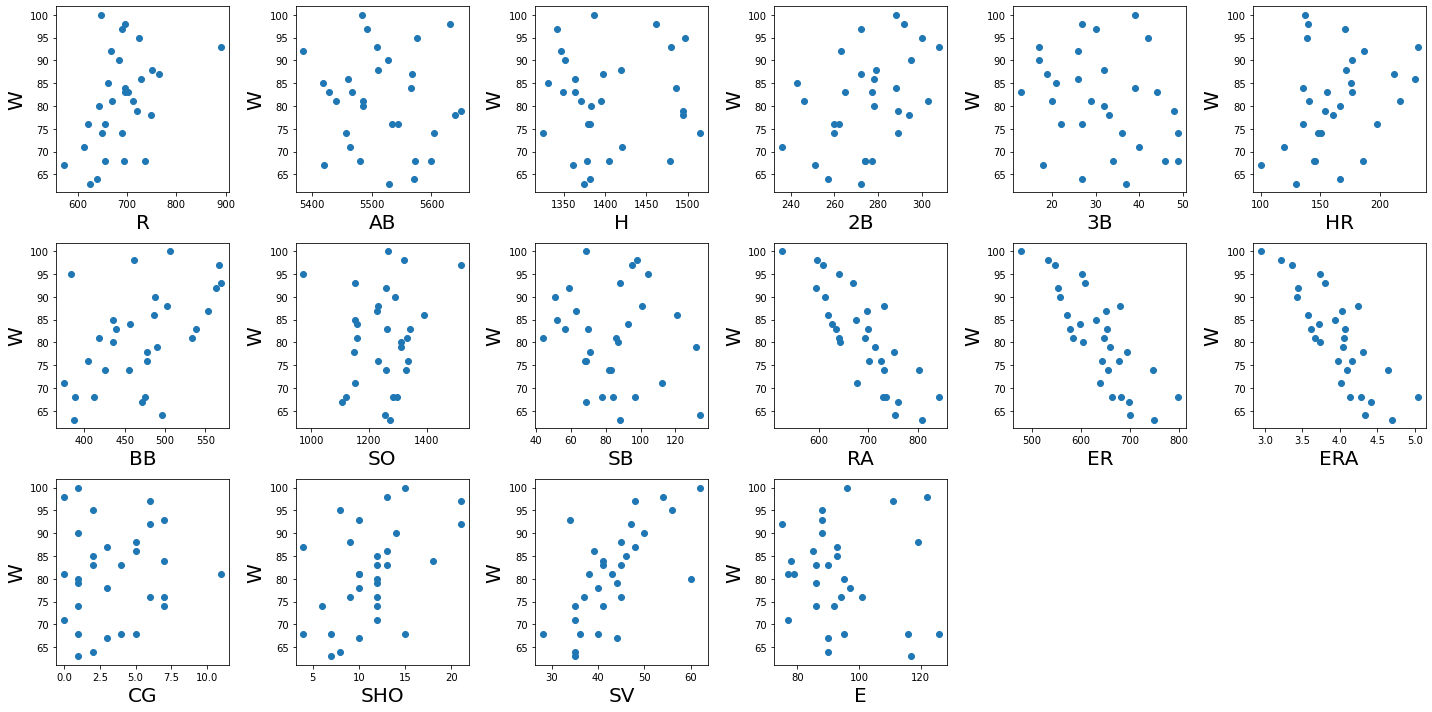

In [24]:
#Vishualize the relationship between target and features columns
plt.figure(figsize=(20,10))
plotnumber=1
for column in X:
    if plotnumber<=18:
        ax = plt.subplot(3,6,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=20)
    plotnumber+=1
plt.tight_layout()

the relationship between fautures and labels are alsmost looks linear realtion

but here RA,ER and ERA are not in relation.

# Bivariant Analysis

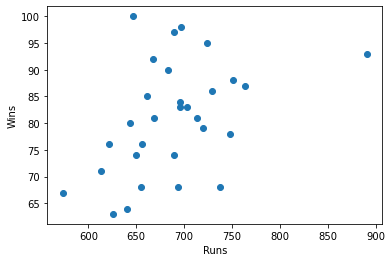

In [25]:
plt.scatter(df.R,df.W)
plt.xlabel("Runs")
plt.ylabel("Wins")
plt.show()

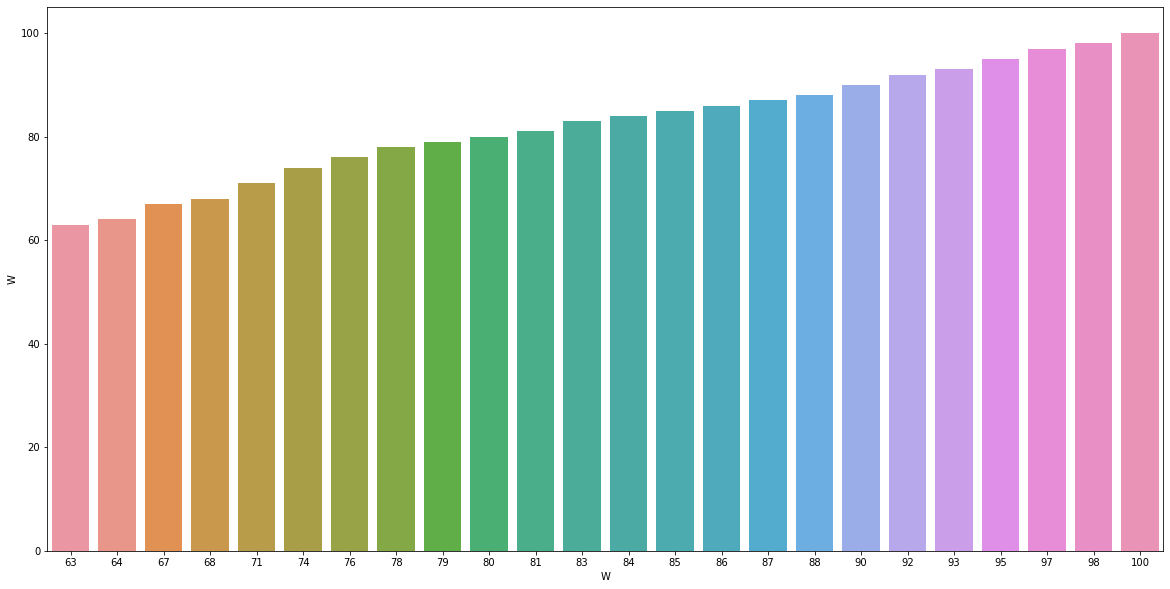

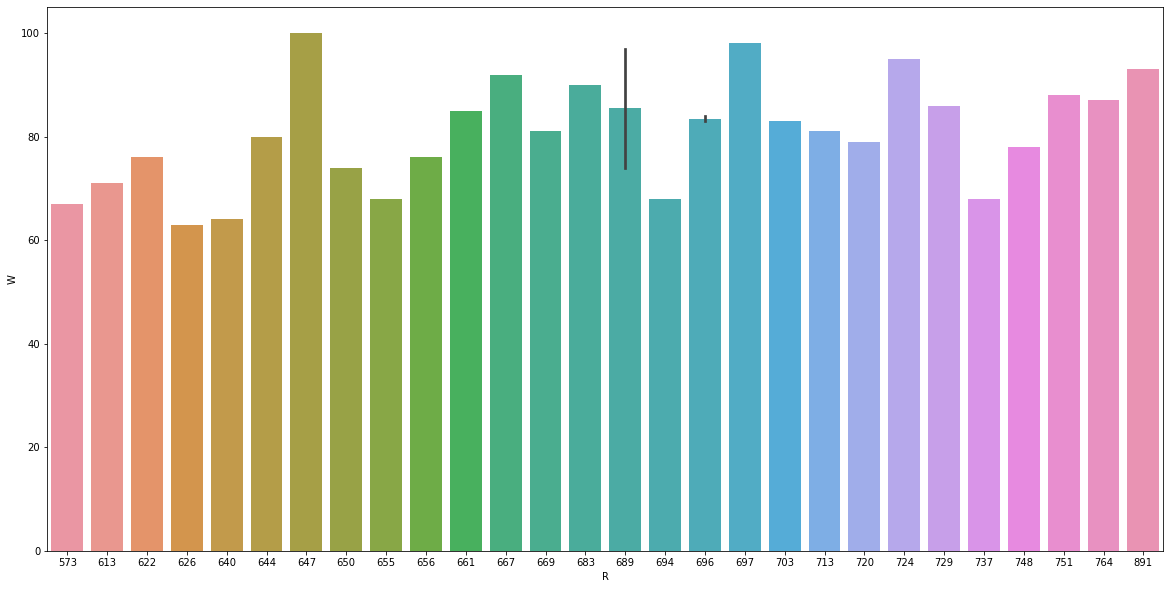

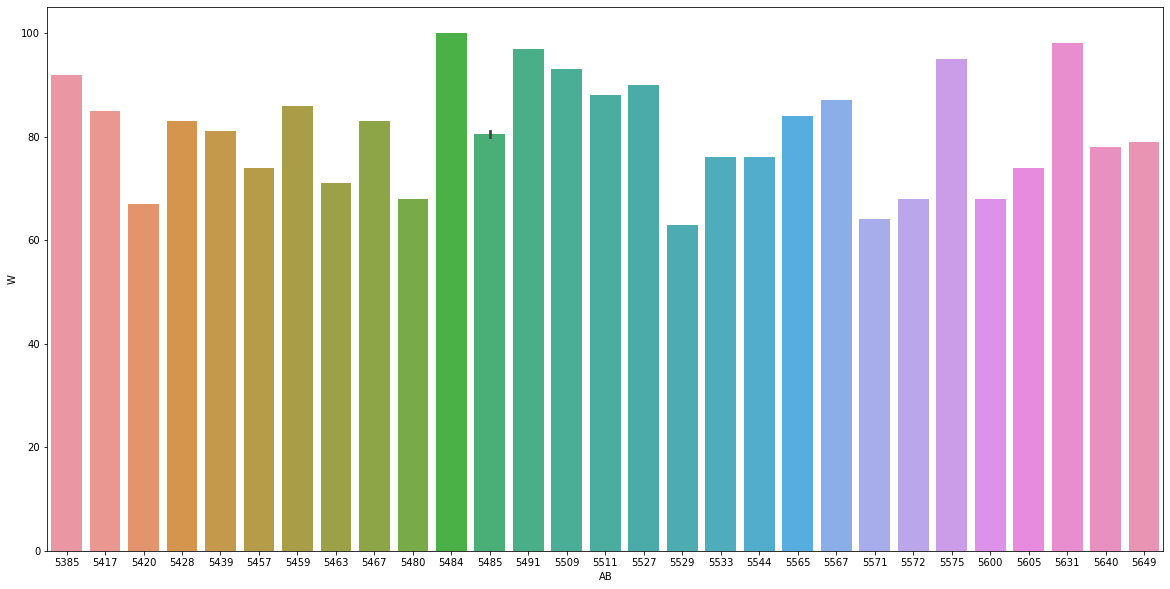

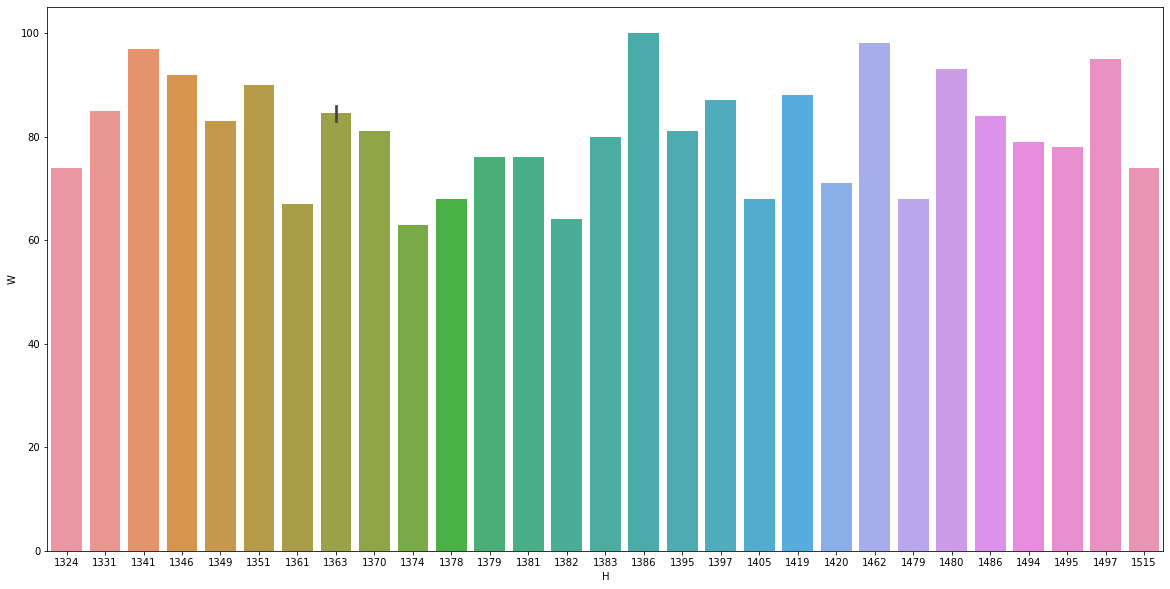

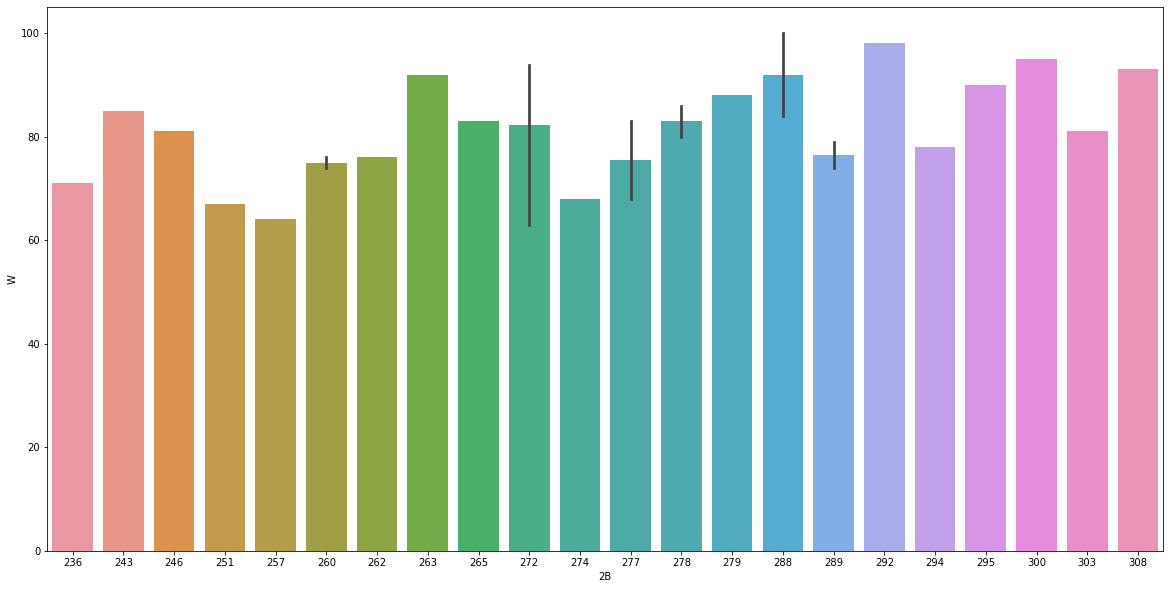

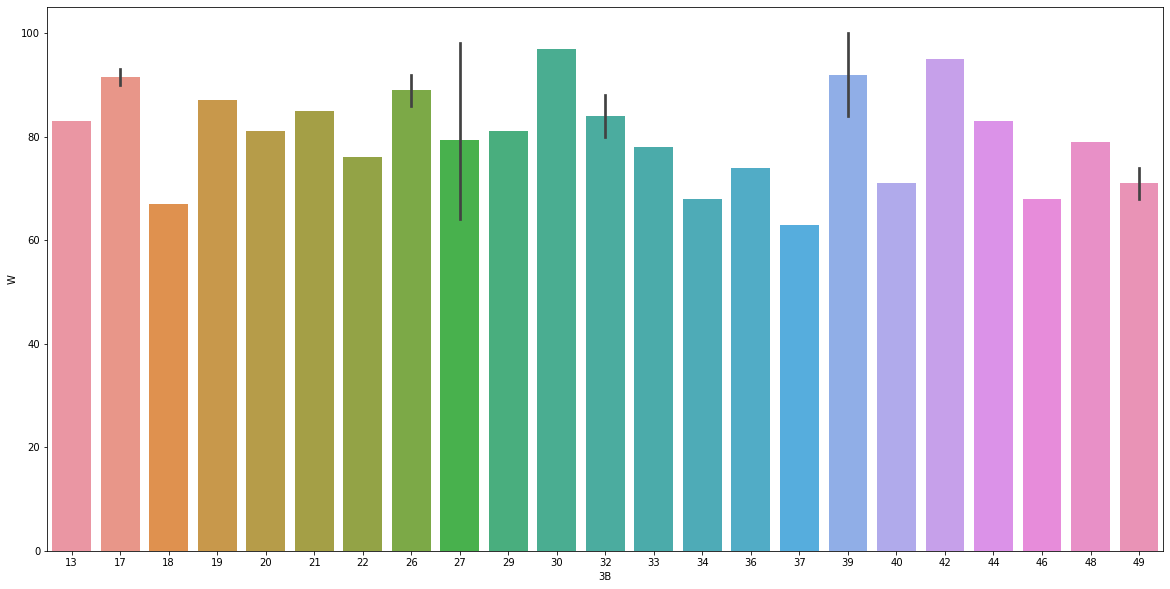

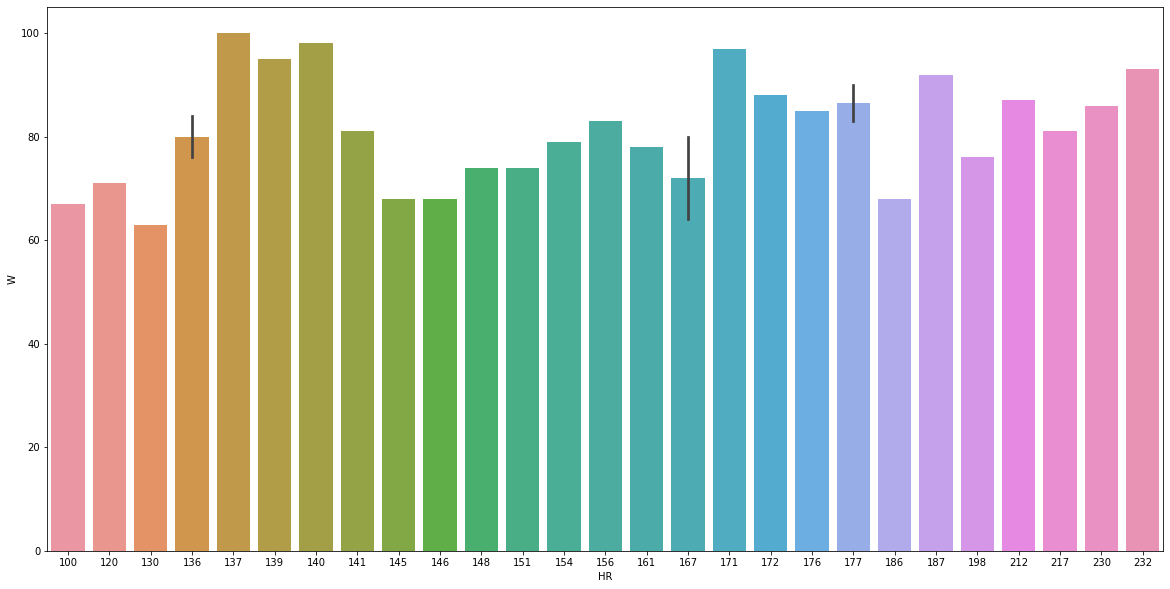

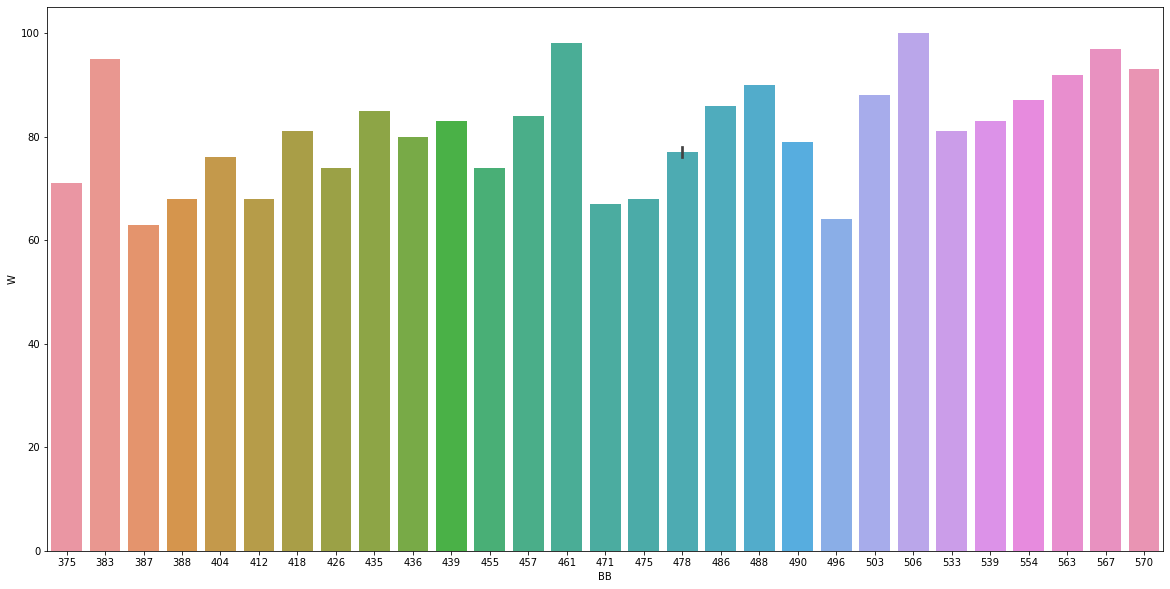

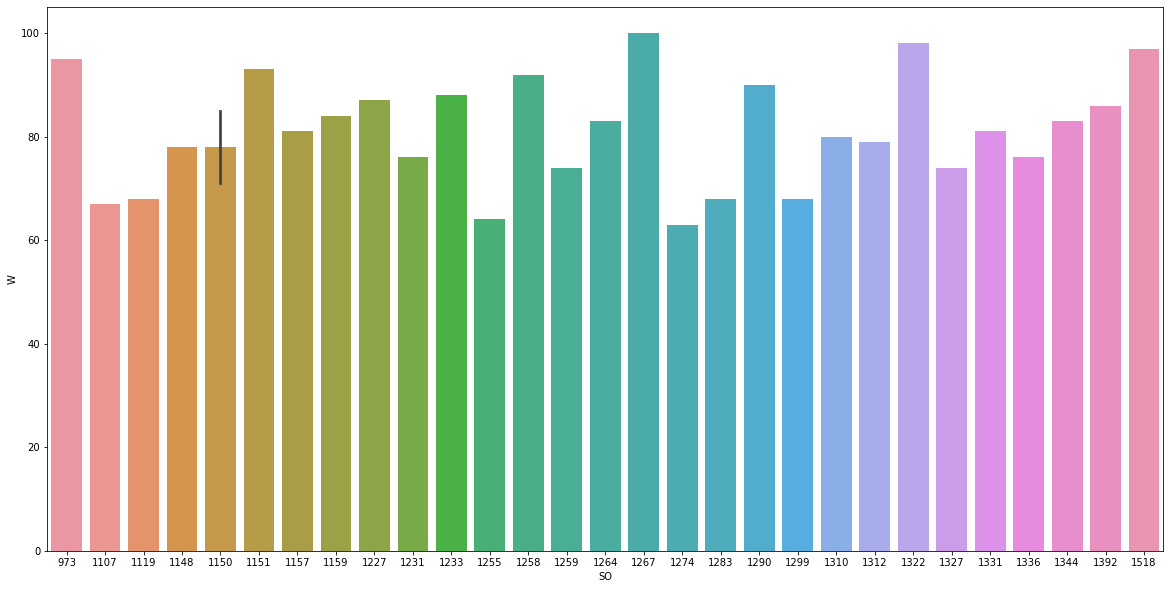

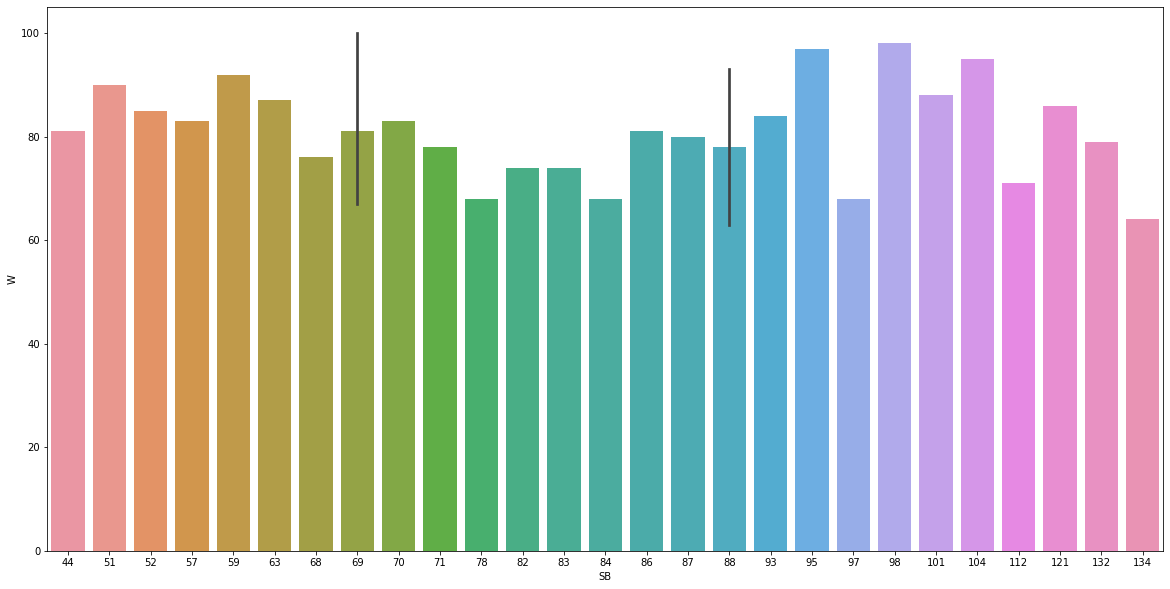

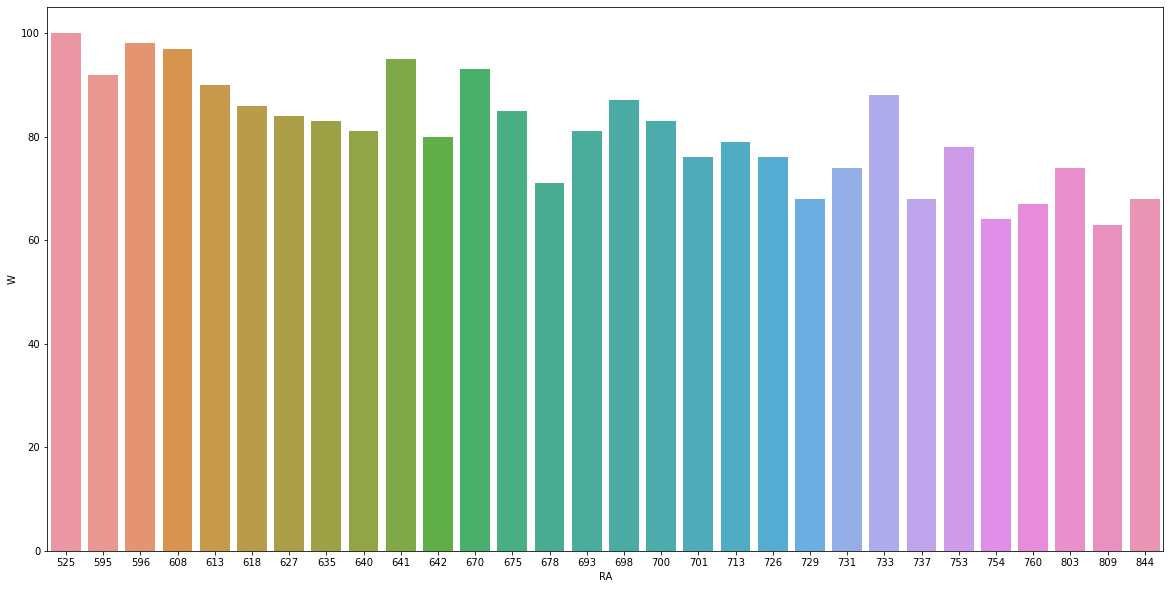

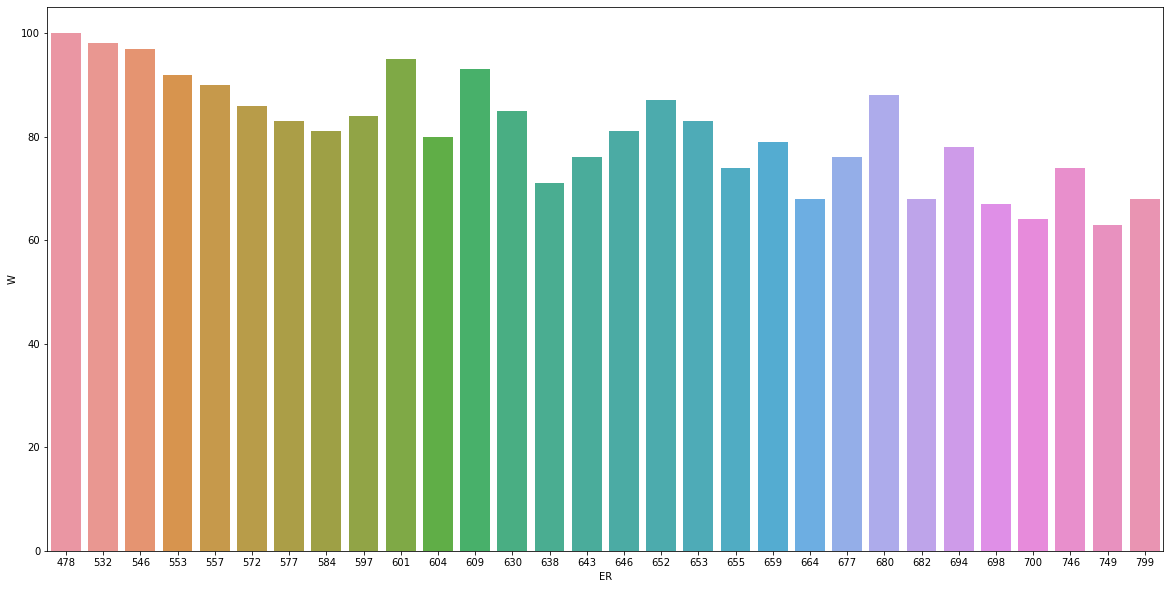

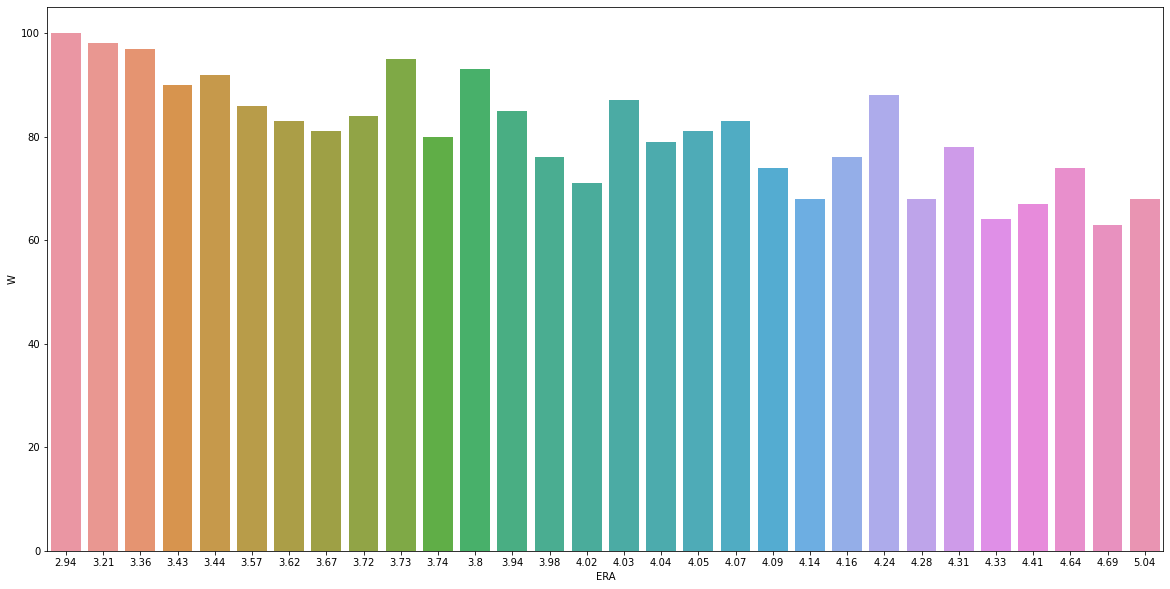

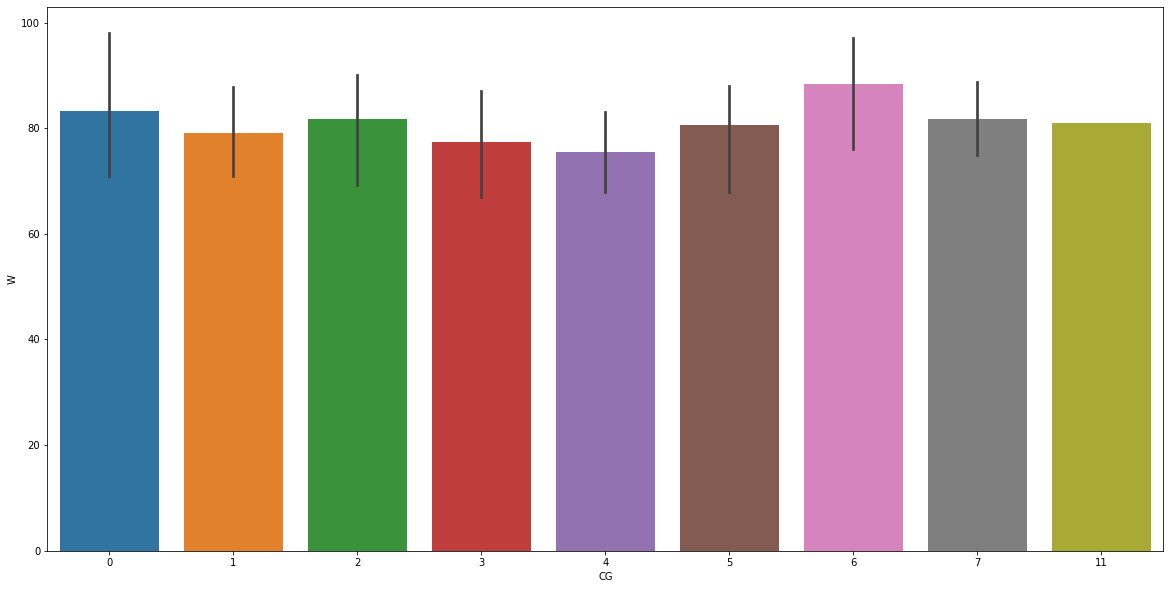

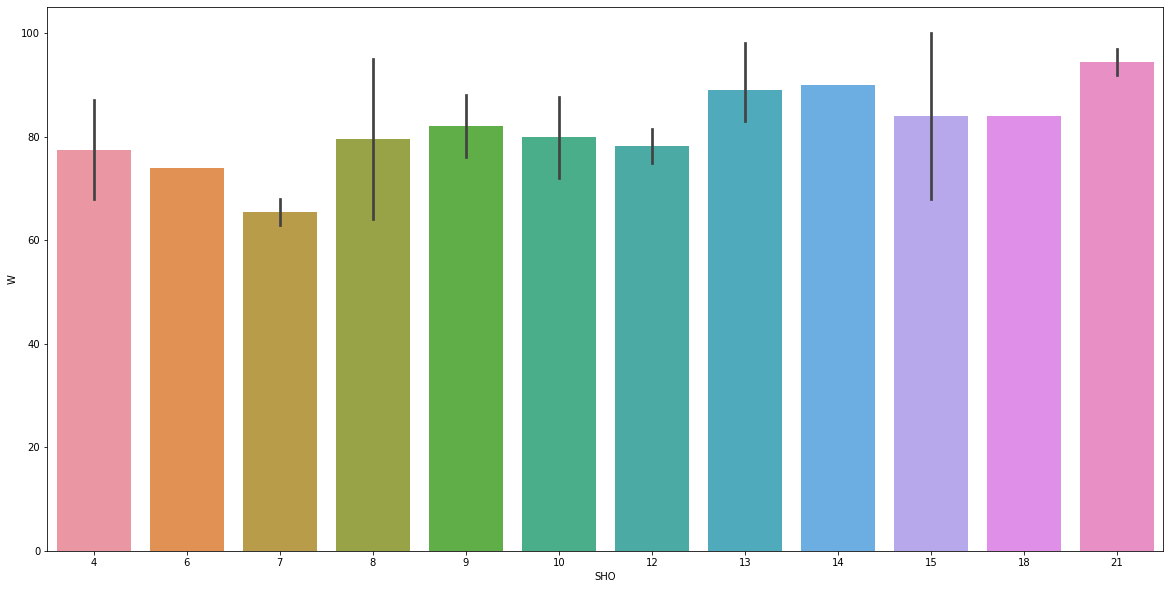

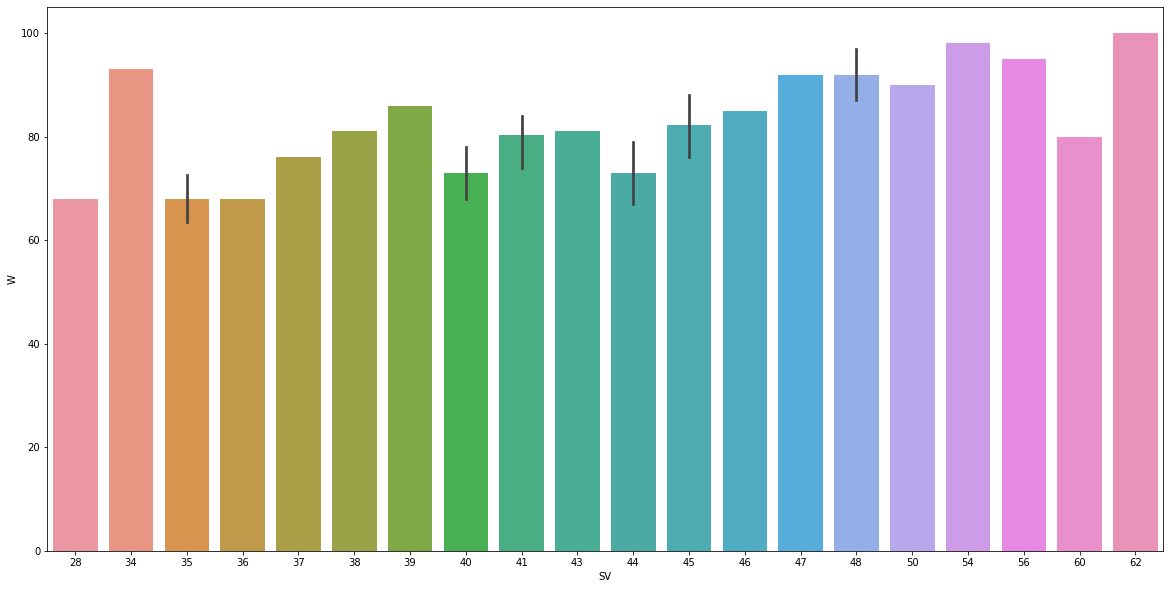

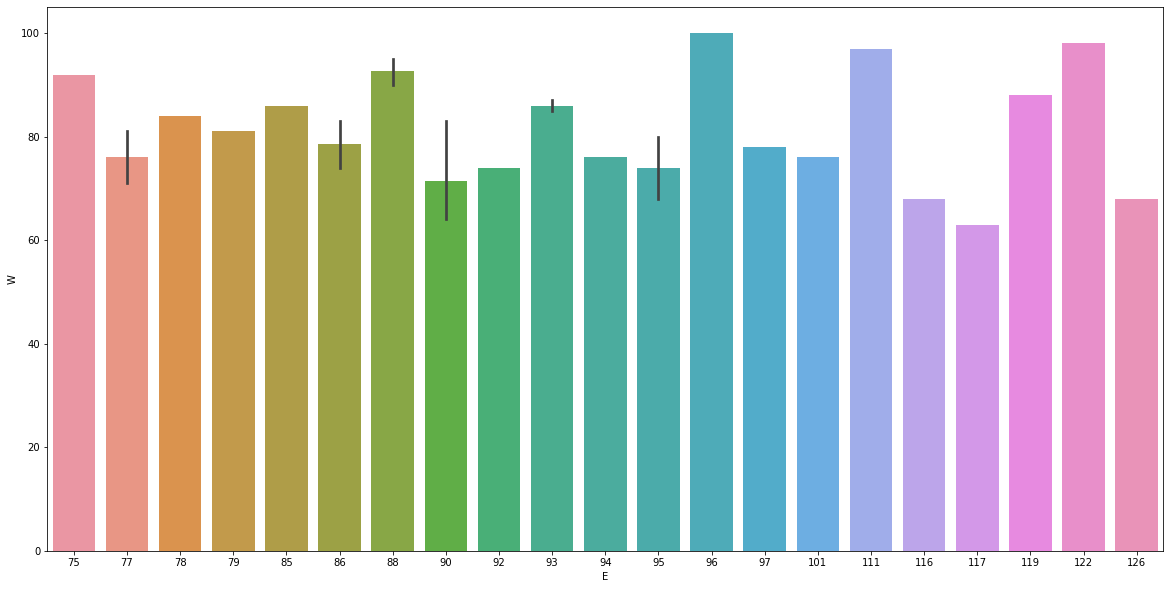

In [26]:
#Visualize feature columns through barplots
for i in df.columns:
    plt.figure(figsize=(20,10))
    sns.barplot(x=df[i],y=df.W)

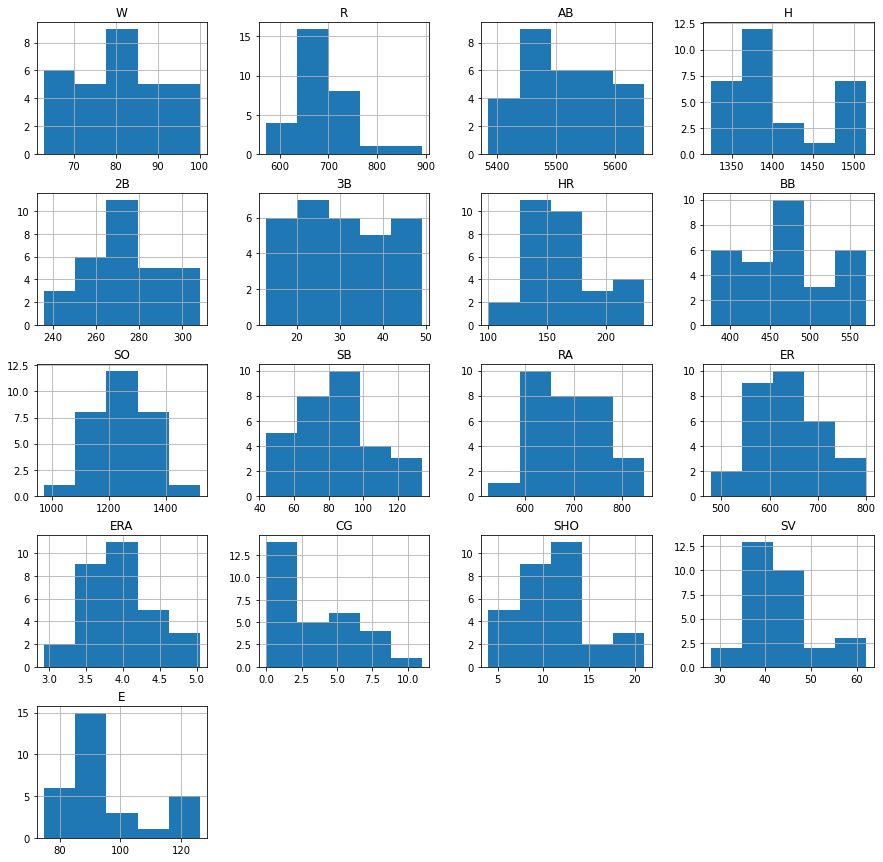

In [27]:
df.hist(bins=5,figsize=(15,15));

This histogram are normally distributed and it is Bivariante analysis there are some skewness is present

# Cheking the outliers

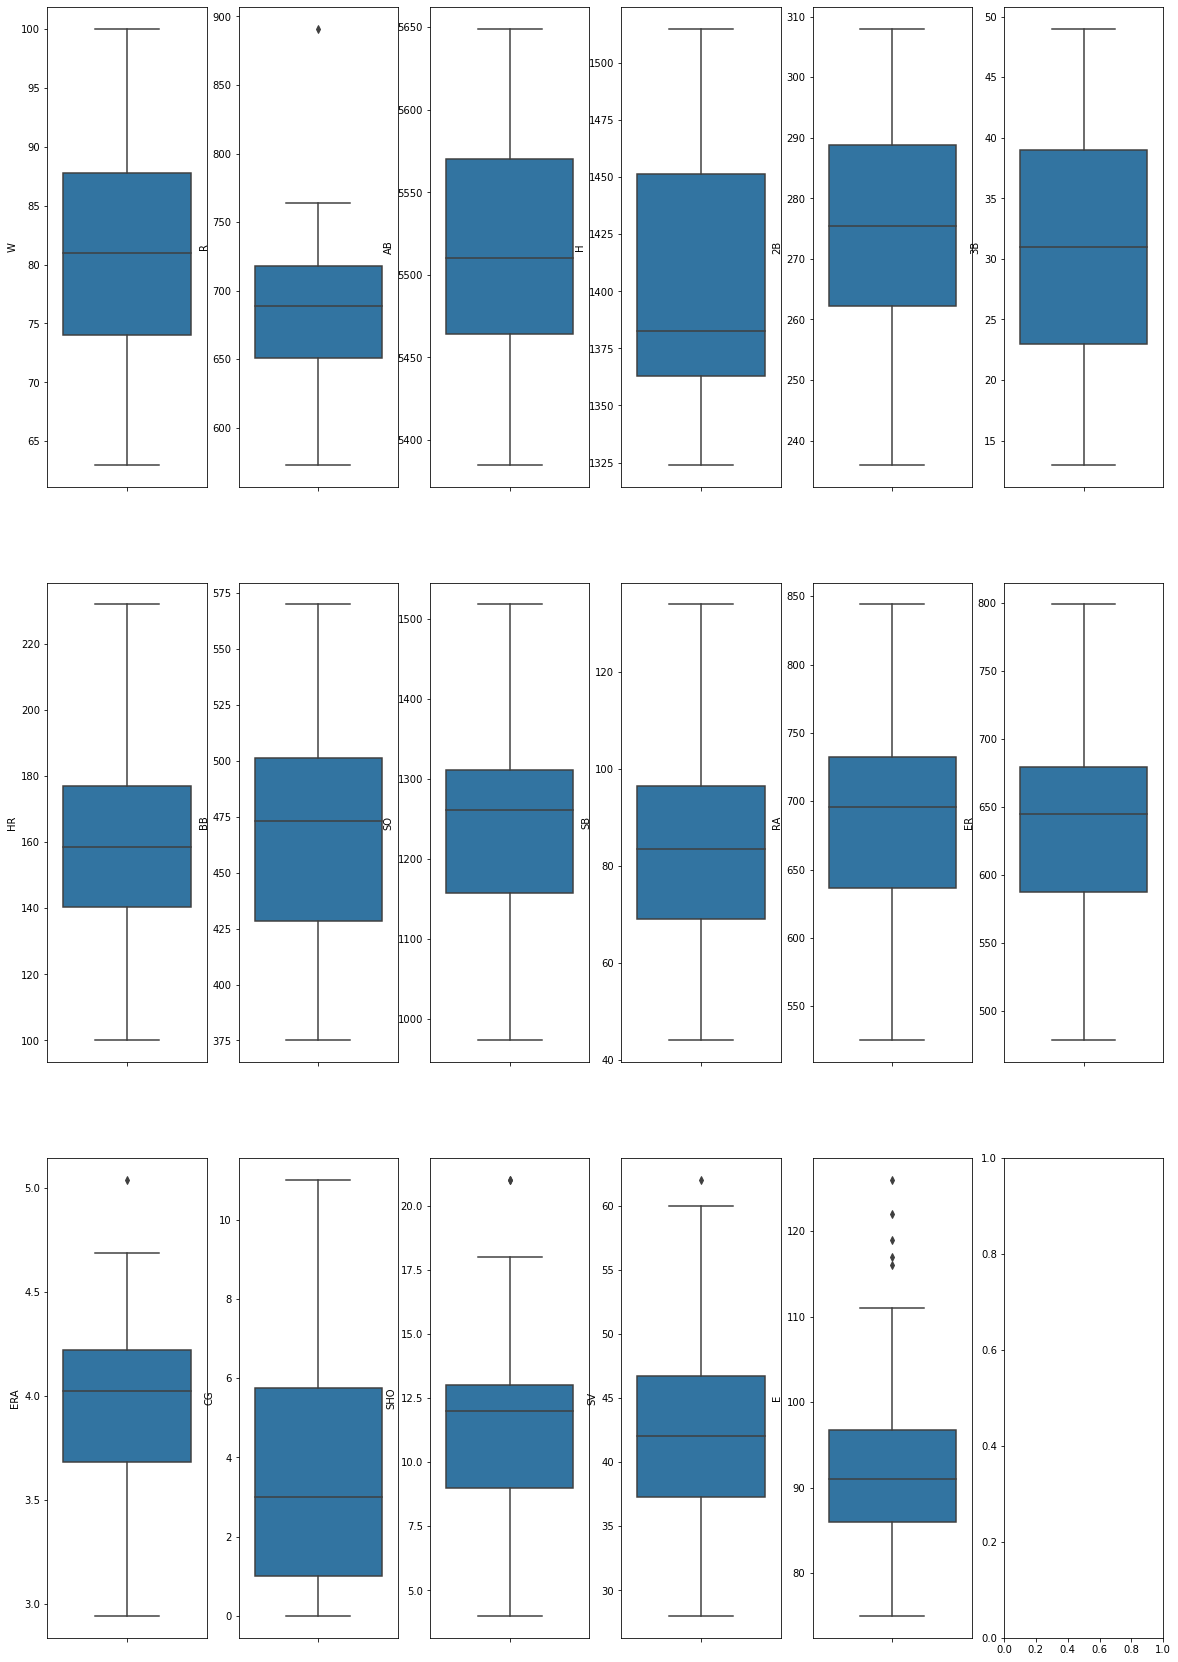

In [28]:
fig,ax=plt.subplots(ncols=6,nrows=3,figsize=(20,30))
index=0
ax=ax.flatten()

for col,value in df.items():
    if col != 'type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+=1

There is some outliers present in some columns such as R,SHO,E,SV andERA 

# Removing outliers using zscore

In [30]:
from scipy.stats import zscore
z=zscore(df)
z

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [31]:
X=df[(z<3).all(axis=1)]
X

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [32]:
X.shape

(29, 17)

In [33]:
#Loss of percentage of datasets
(30-29)/30*100

3.3333333333333335

There is loss of percentage is 3% 

# Checking the skewness 

In [34]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [36]:
#Cheking the skewness after removing outliers
X.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform
df_new=power_transform(X)
df_new=pd.DataFrame(df_new,columns=X.columns)

In [39]:
df_new.skew()

W     -0.015560
R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [40]:
scaler=StandardScaler()
new_df=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [41]:
new_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.239947,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,0.043934,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-0.446099,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,-0.642112,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


In [42]:
x=new_df.drop('W',axis=1)
y=new_df['W']

# Building the model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=50)

In [59]:
#Checking the shape of the train test split
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23, 16), (6, 16), (23,), (6,))

In [57]:
#Giving new variable name for all algorithm
lr = LinearRegression()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
ls=Lasso()
ri=Ridge()
rf=RandomForestRegressor()

In [61]:
models = LinearRegression(),Ridge(),Lasso(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor()

In [64]:
#coefficient matrix
#MAE MSE RMSE using with metrics
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared  error',mse)
    print('Root means squared error',rmse)
    print('R2 score',r2)
    print('-----------------------------------------------------------------------')



In [65]:
for i in models:
    create_model(i)

LinearRegression()
Mean absolute error 0.2785891384918527
Mean squared  error 0.09751711188545699
Root means squared error 0.31227729966402773
R2 score 0.8402586950388157
-----------------------------------------------------------------------
Ridge()
Mean absolute error 0.1817895413150659
Mean squared  error 0.06526698378252742
Root means squared error 0.25547403739426716
R2 score 0.8930871417464916
-----------------------------------------------------------------------
Lasso()
Mean absolute error 1.073810747445124
Mean squared  error 1.4061356947234749
Root means squared error 1.1858059262474088
R2 score -1.3033695982656286
-----------------------------------------------------------------------
RandomForestRegressor()
Mean absolute error 0.5473665062026326
Mean squared  error 0.4142685738270364
Root means squared error 0.6436369891693892
R2 score 0.3213929195804196
-----------------------------------------------------------------------
KNeighborsRegressor()
Mean absolute error 0.57497

# Crosss Validation

In [66]:
#do cross validation for score
print(cross_val_score(lr,x,y,cv=5).mean())

0.03762866049631379


In [67]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.0398480673472857


In [68]:
print(cross_val_score(rf,x,y,cv=5).mean())

-0.6729662340326354


In [69]:
print(cross_val_score(ls,x,y,cv=5).mean())

-0.3862685306927355


In [70]:
print(cross_val_score(ab,x,y,cv=5).mean())

-1.3137579261907235


In [71]:
print(cross_val_score(ri,x,y,cv=5).mean())

0.3374778769069561


In [75]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  Ridge() 0.1817895413150659
Minimum Mean squared error is shown by  Ridge() 0.06526698378252742
Minimum Root Mean squared error is shown by  Ridge() 0.25547403739426716
Maximun R2 Score is shown by  Ridge() 0.8930871417464916


Difference between R2 score and cross validation score is least in Ridge regression model, hence we'll work on Ridge Model.

# Hyperparameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [77]:
parameters={'alpha':[0.1,0.01,0.001,0.0001],
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
           }

In [78]:
model=Ridge()

In [79]:
grid_search=GridSearchCV(Ridge(),parameters,cv=5)

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [81]:
grid_search.best_params_

{'alpha': 0.1, 'solver': 'saga'}

In [82]:
# Ridge model
ri =Ridge(alpha=0.1,solver ='saga')
ri.fit(x_train,y_train)
ri.score(x_train,y_train)
predict = ri.predict(x_test)

print(r2_score(y_test,predict))

0.917742951376112


In [83]:
print(cross_val_score(ri,x,y,cv=5).mean())

0.31150698068424354


my ridge regression is improved after hyper paramerter tuning

Ridge Regrssion model is giving higher accuracy so we are selecting this model.

# Saving the model

In [88]:
import joblib
joblib.dump(ri,"Baseball_wins_predict")

['Baseball_wins_predict']